# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
import warnings

In [10]:
warnings.filterwarnings('ignore')

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [12]:
#Understanding the dataset require performing following or similar actions

In [13]:
df = pd.read_csv('data/vehicles.csv')

In [14]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [16]:
#The dataset contains 18 columns and 426,880 entries.
#However, some features have minimal influence on a vehicle's overall cost,while others significantly impact how the vehicle’s value is determined.
#The columns having no effect on overall cost are 'Id' & 'VIN'.
#Factors like humidity, rain and heat vary in every 'region' & 'state' and may contribute to depreciation, but can be suitably covered in 'condition'.
#'Year', 'Manufacturer', 'Condition' and other such factors are more likley to have significant impact.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [18]:
#Data Examination 
#First & foremost, unique & null values needs to be identified.

In [19]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [20]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [21]:
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [22]:
#Checking data, if any unique value is 'Zero', as they will provide misleading data

In [23]:
df.eq(0).sum()

id                  0
region              0
price           32895
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         1965
title_status        0
transmission        0
VIN                 0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64

In [24]:
#Checking for duplicate listings. The easiest method is to find duplicate 'VIN' as it is unique to each car

In [25]:
df['VIN'].value_counts()

VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
1GCEK19J78Z219711      1
JA4AT3AW1AZ006543      1
4T1BF28B61U153724      1
JTHCF5C25A5041393      1
SAJGX2749VCOO8376      1
Name: count, Length: 118246, dtype: int64

In [26]:
#Checking for missing 'VIN' entries
df['VIN'].isnull().sum()

161042

In [27]:
#There are 161042 entries (out of total 426880 entries) which do not have any 'VIN' input. 
#Also, there is a likelihood of lot of repetition of 'VIN' entries due to wrong or duplicate entries.

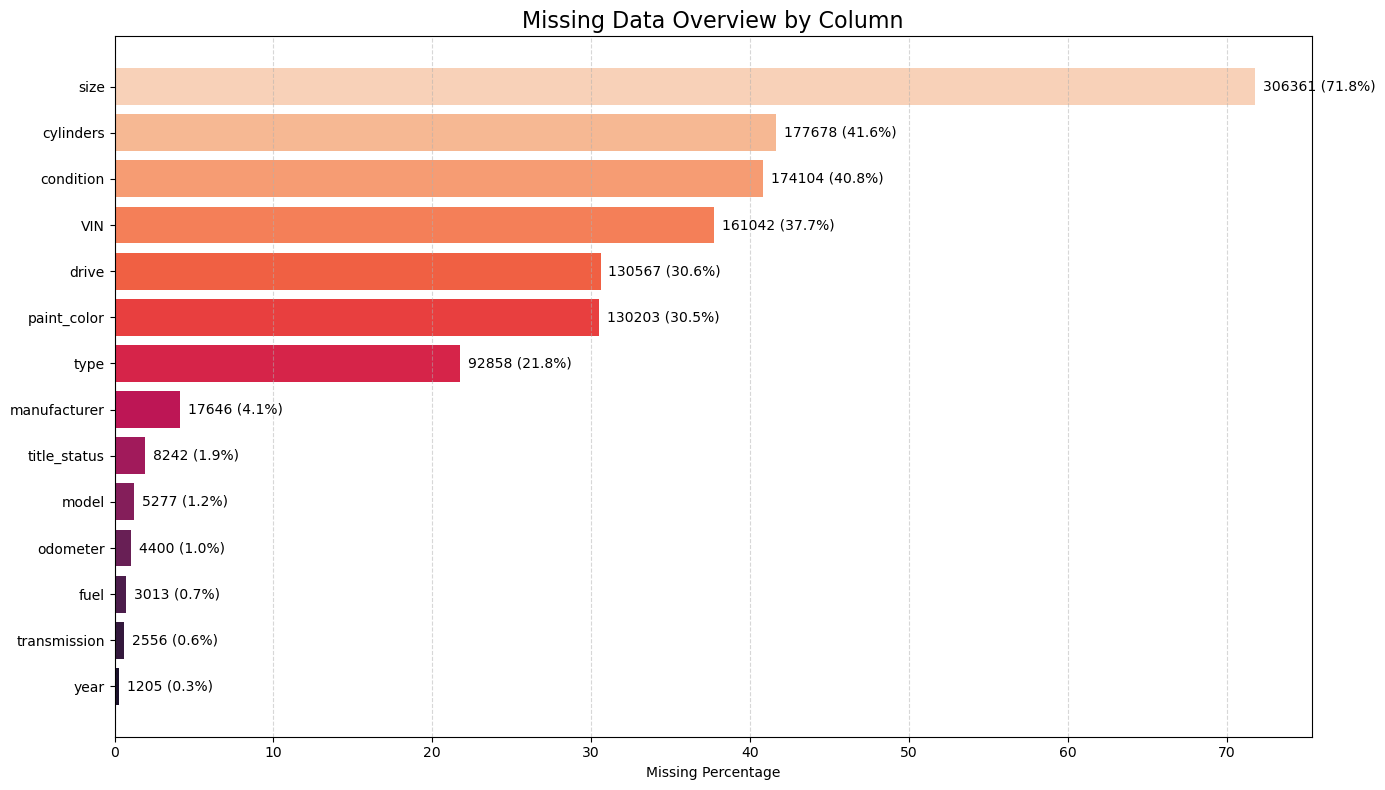

In [28]:
#Running a similar check on all columns to find overall number of missing values, following was observed

#Computing missing values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

#Creating summary DataFrame
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
missing_df = missing_df.sort_values(by='Missing %', ascending=True)

#Plotting the data
plt.figure(figsize=(14, 8))
bar_colors = sns.color_palette("rocket", len(missing_df))  # Color gradient
bars = plt.barh(missing_df.index, missing_df['Missing %'], color=bar_colors)

#Annotating the plot data
for i, (count, percent) in enumerate(zip(missing_df['Missing Count'], missing_df['Missing %'])):
    plt.text(percent + 0.5, i, f"{count} ({percent:.1f}%)", va='center', fontsize=10)

plt.xlabel("Missing Percentage")
plt.title("Missing Data Overview by Column", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [29]:
#As visible above, size, cylinders, condition, VIN, drive, paint colour and type has a large data missing
#The same needs to be cleaned or else, the same may induce errors later

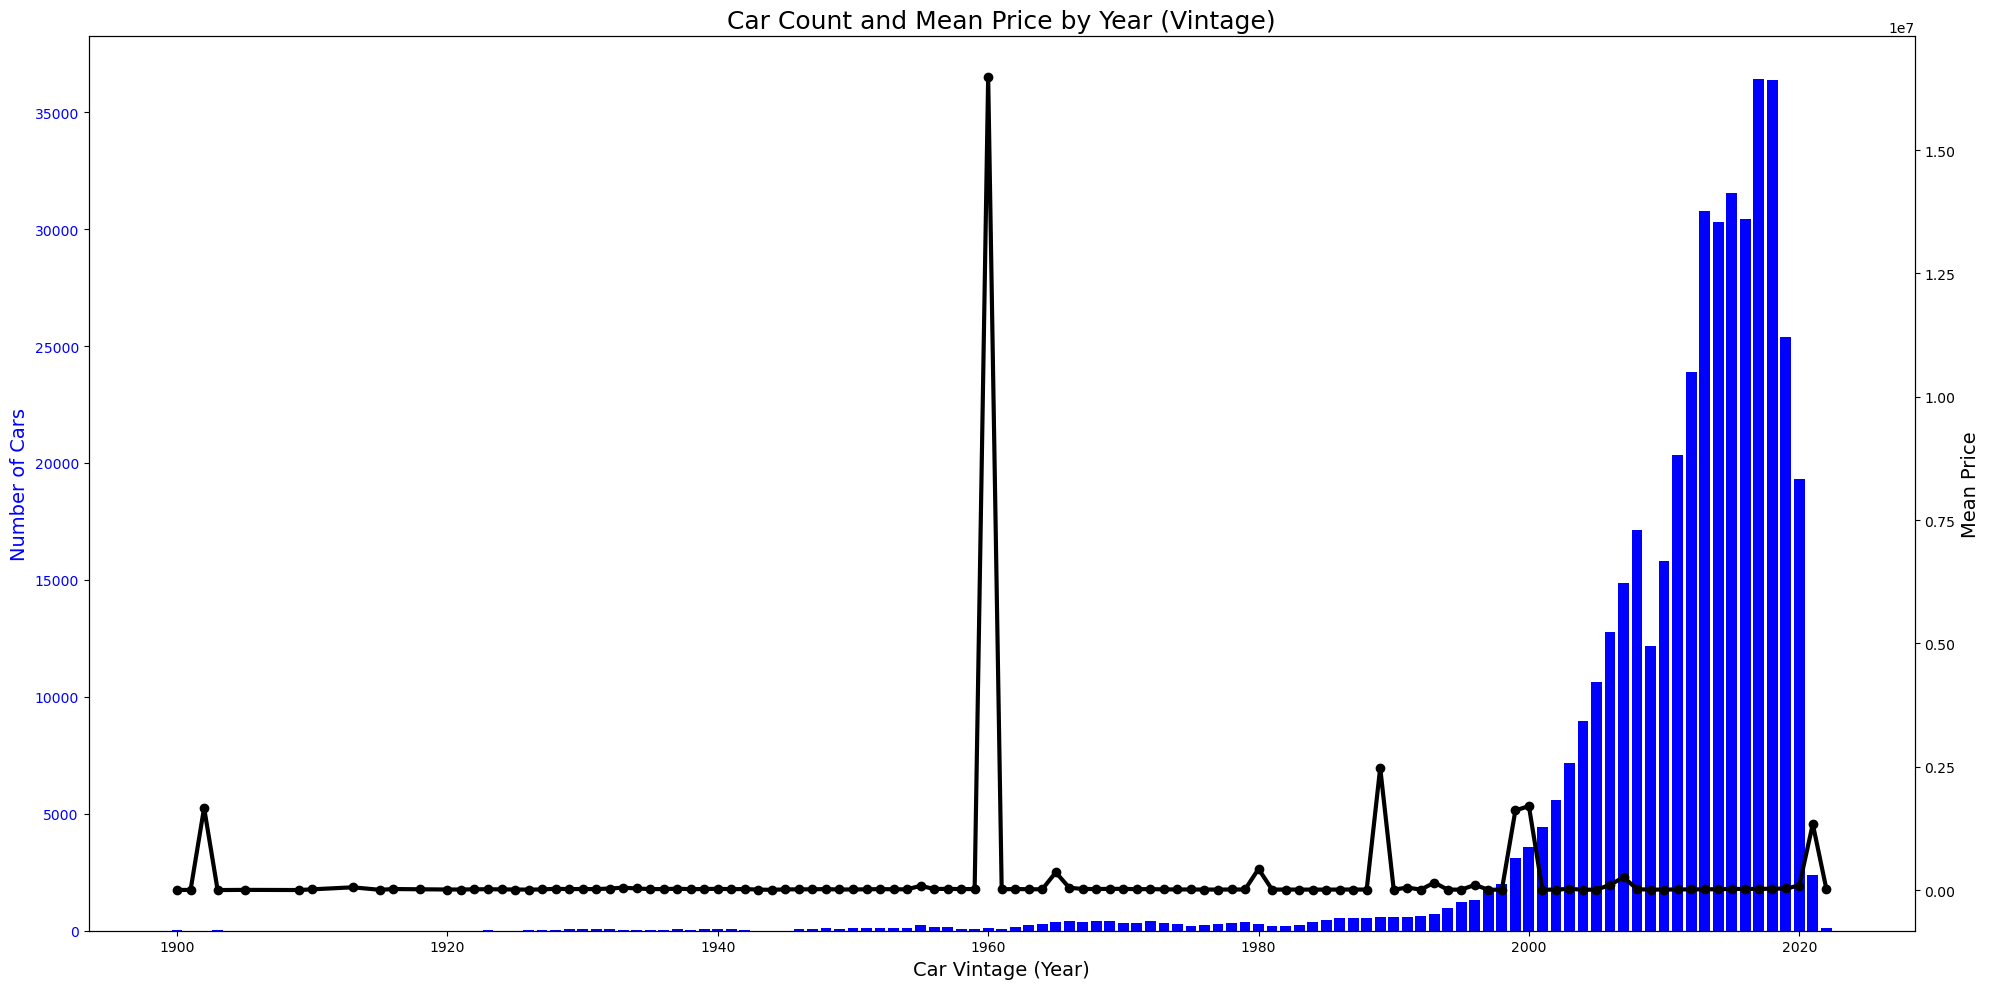

In [30]:
#Price of a car will bear a direct relationship with the Vintage 
#The relation between vinatge and mean price has been analysed below

# Step 1: Group data by car vintage (assumed column: 'year')
year_counts = df['year'].value_counts().sort_index()
mean_prices_by_year = df.groupby('year')['price'].mean().reindex(year_counts.index)

# Step 2: Plot
fig, ax1 = plt.subplots(figsize=(20, 10))

# Bar plot for number of cars per year
color1 = 'blue'
ax1.bar(year_counts.index, year_counts.values, color=color1)
ax1.set_xlabel('Car Vintage (Year)', fontsize=14)
ax1.set_ylabel('Number of Cars', color=color1, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title('Car Count and Mean Price by Year (Vintage)', fontsize=18)

# Line plot for mean price per year
ax2 = ax1.twinx()
color2 = 'black'
ax2.plot(year_counts.index, mean_prices_by_year, color=color2, marker='o', linewidth=3)
ax2.set_ylabel('Mean Price', color=color2, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color2)

plt.tight_layout()
plt.show()


In [31]:
#The above data show aberrations 1903, 1960, 1980, 1989, 1999, 2000 & 2020; which must be resolved to present a clean data 

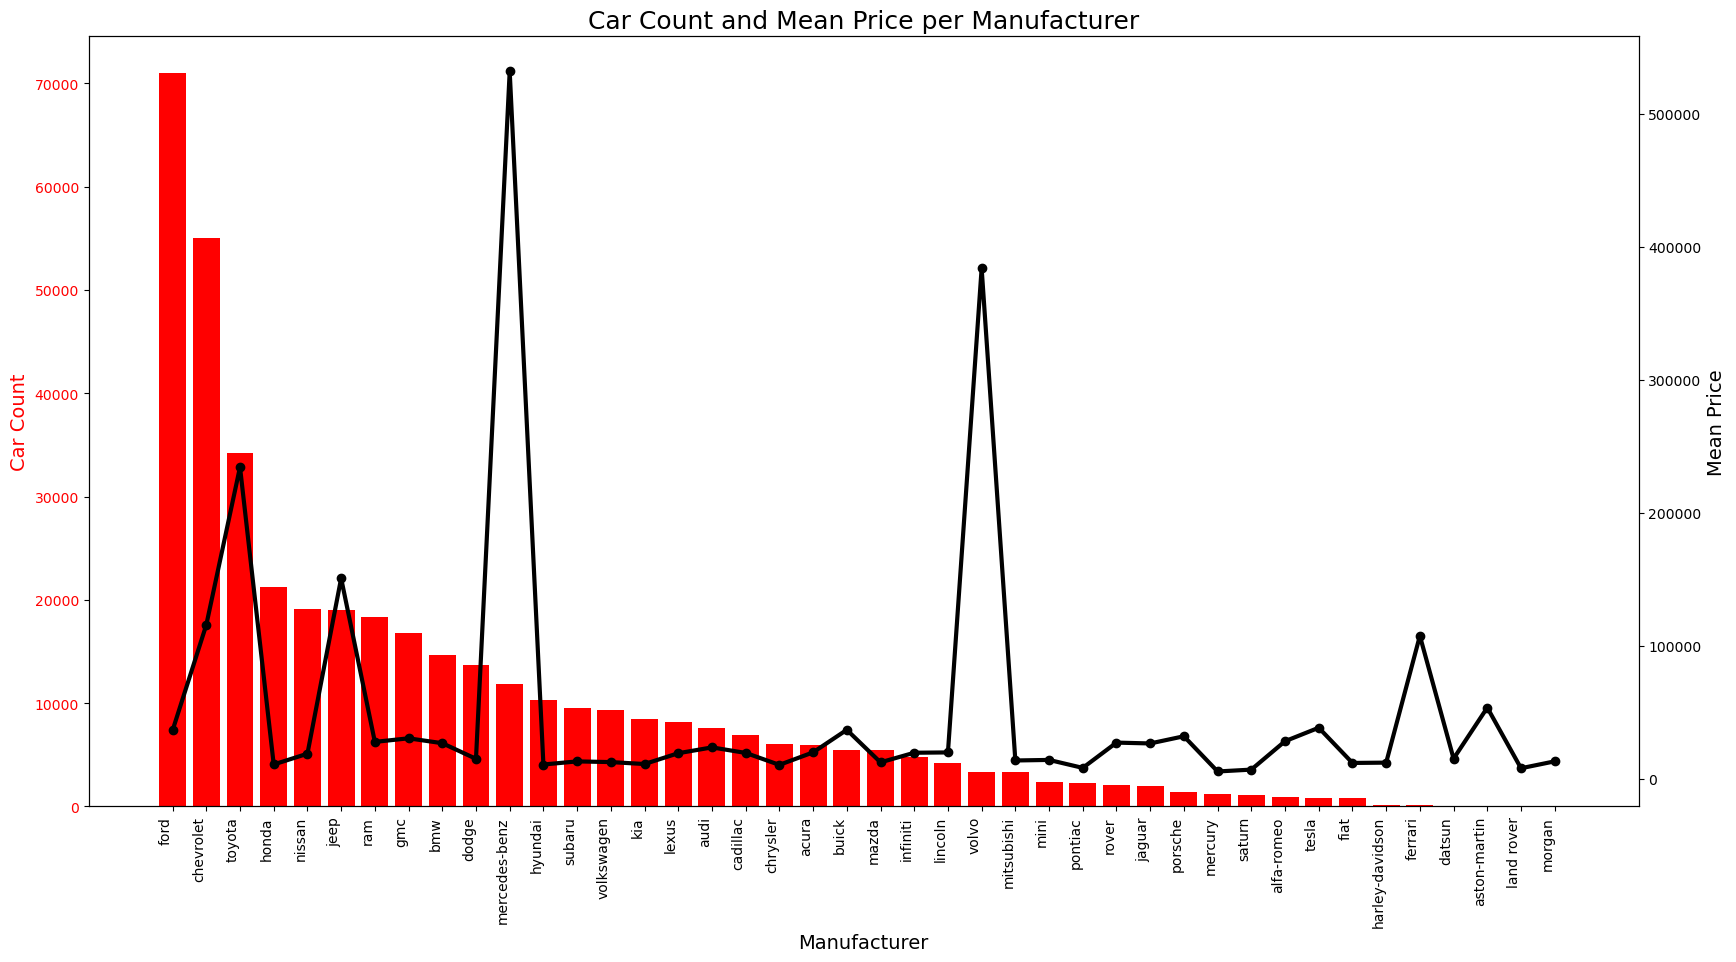

In [32]:
#The brand value associated with a manufacturer will affect the car value; bigger names are likely to fetch more premium
#Moreover, widespread availability of a particular brand may affect the car value adversely
#The corelation is analysed below

manufacturer_counts = df['manufacturer'].value_counts()
manufacturer_order = manufacturer_counts.index
mean_prices = df.groupby('manufacturer')['price'].mean().reindex(manufacturer_order)

fig, ax1 = plt.subplots(figsize=(20, 10))

# Bar plot for count
color1 = 'red'
ax1.bar(manufacturer_order, manufacturer_counts, color=color1)
ax1.set_ylabel('Car Count', fontsize=14, color=color1)
ax1.set_xlabel('Manufacturer', fontsize=14)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(manufacturer_order, rotation=90, ha='right')
ax1.set_title('Car Count and Mean Price per Manufacturer', fontsize=18)

# Secondary y-axis for mean price
ax2 = ax1.twinx()
color2 = 'black'
ax2.plot(manufacturer_order, mean_prices, color=color2, marker='o', linewidth=3)
ax2.set_ylabel('Mean Price', fontsize=14, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.show()


In [33]:
#As visible above, the following can be deduced
#Cars of Mercedes & Volvo has huge variation from mean price, whereas Ferrari is not able to match them
#Cars of Jeep, Rover, Jaguar, Porsche, Alpha-romeo, Tesla and Aston Martin also do not follow the Mean price pattern
#Surprisingly, Chevrolet, Buick & Toyota also do not follow the Mean price pattern despite not being a luxury brand
#Such factors will skew the data and needs to be factored accordingly

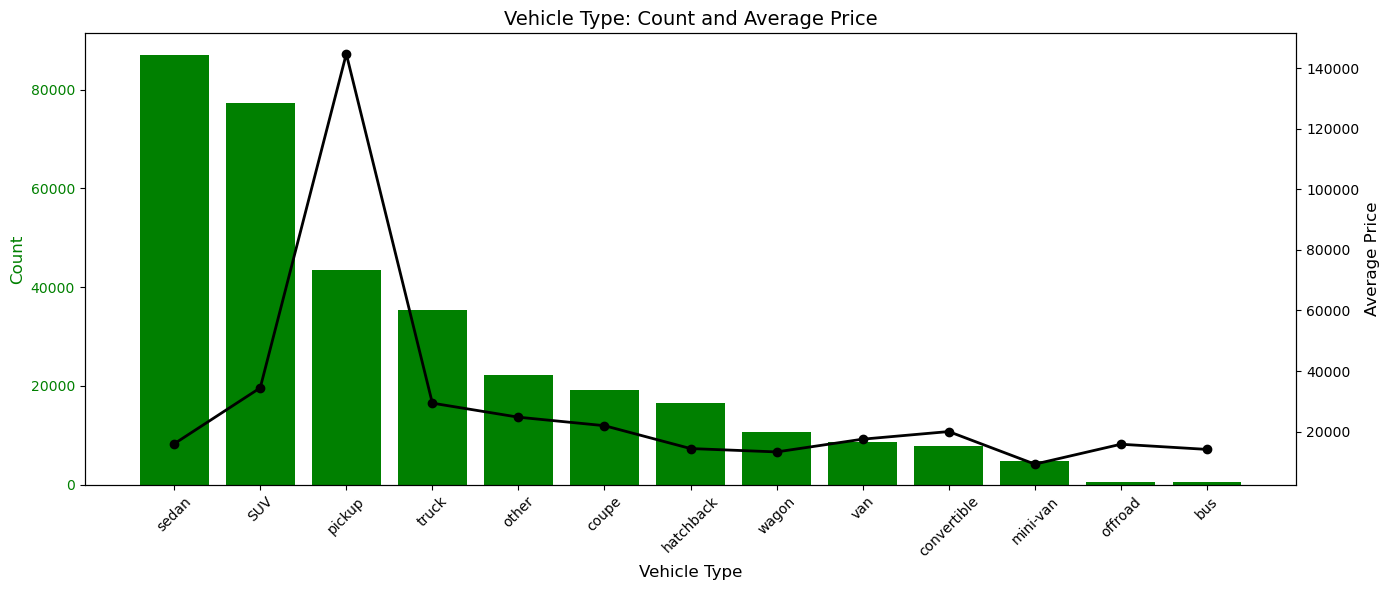

In [34]:
#Another important factor to be considered is the 'Type' of vehicle and price associated with it as every customer has different needs & expectations
#Analysing the data for type of vehicle and average price associated

#Preparing data
type_counts = df['type'].value_counts()
type_avg_price = df.groupby('type')['price'].mean().reindex(type_counts.index)

#Creating plot
fig, ax1 = plt.subplots(figsize=(14, 6))

#Bar plot for count
color1 = 'green'
ax1.bar(type_counts.index, type_counts.values, color=color1)
ax1.set_xlabel("Vehicle Type", fontsize=12)
ax1.set_ylabel("Count", color=color1, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(type_counts.index, rotation=45)

#Line plot for average price
ax2 = ax1.twinx()
color2 = 'black'
ax2.plot(type_avg_price.index, type_avg_price.values, color=color2, marker='o', linewidth=2, label='Average Price')
ax2.set_ylabel("Average Price", color=color2, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Vehicle Type: Count and Average Price", fontsize=14)
plt.tight_layout()
plt.show()


In [35]:
#Pickup has exponential average price against availability
#Sedan & SUV do not enjoy such corelation
#Offroad & bus also seems to be defying the trend

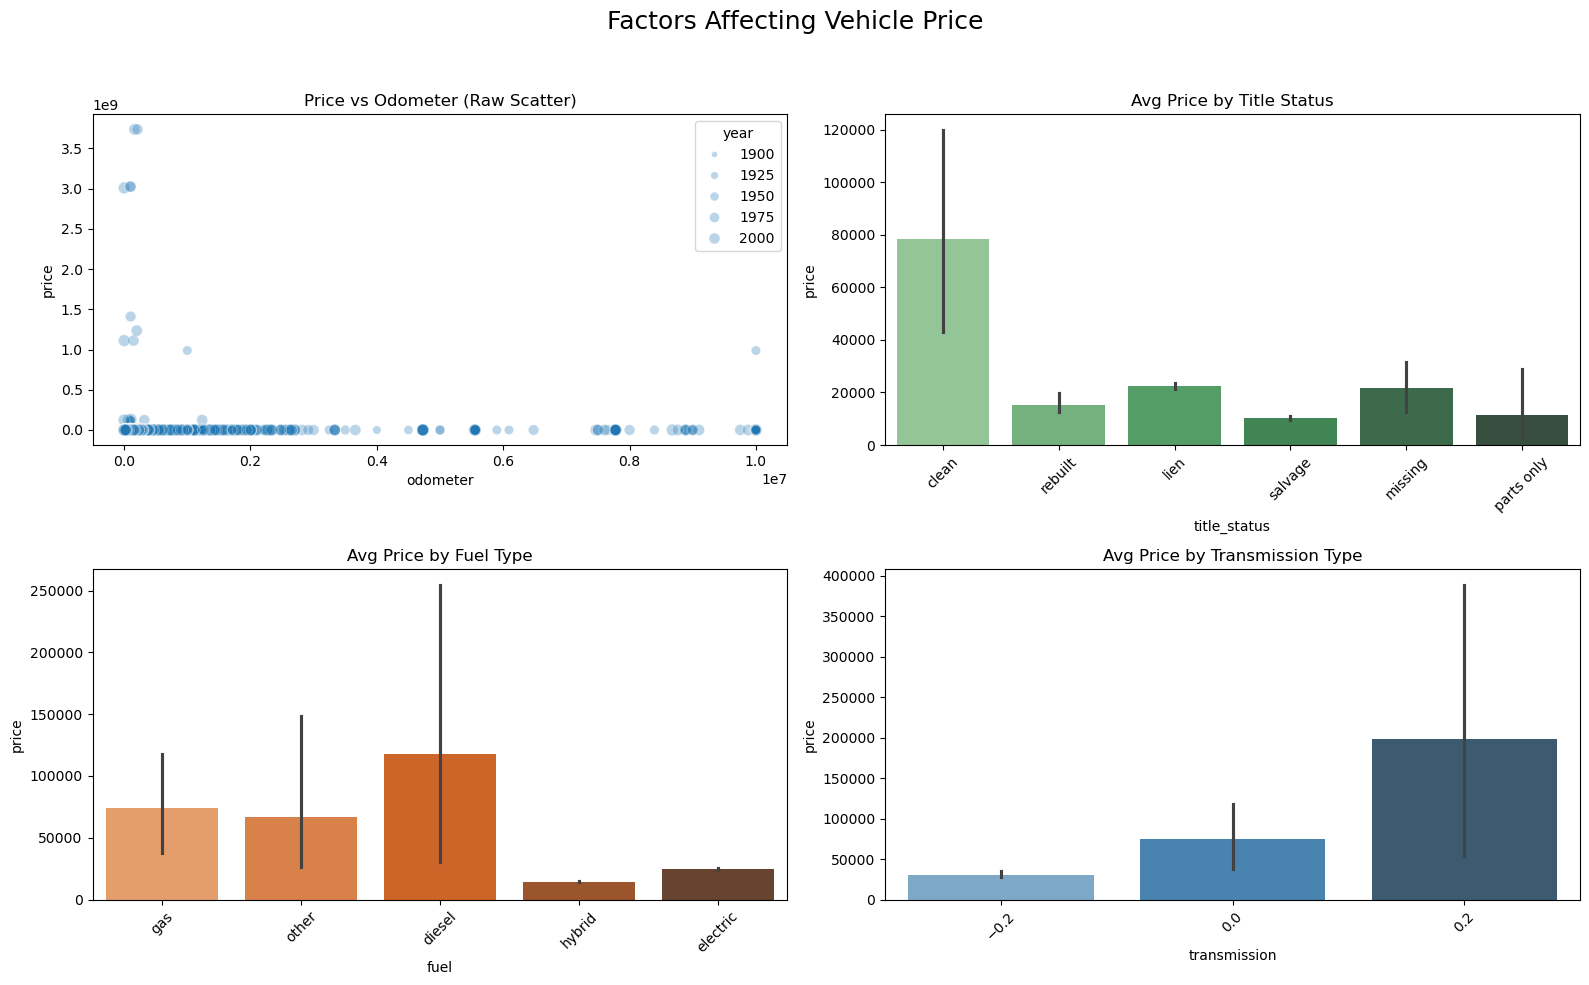

In [36]:
#In addition to the above many other factors like Odometer, Transmission, Fuel type and Title status can also affect the price of the vehicle

df['odometer_bin'] = pd.cut(df['odometer'], bins=10)

#Creating plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

#Average Price by Odometer Range
sns.scatterplot(data=df, x='odometer', y='price', size = 'year', ax=axes[0, 0], alpha=0.3)
axes[0, 0].set_title('Price vs Odometer (Raw Scatter)')

#Average Price by Title Status
sns.barplot(data=df, x='title_status', y='price', ax=axes[0, 1], palette='Greens_d')
axes[0, 1].set_title('Avg Price by Title Status')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

#Average Price by Fuel Type
sns.barplot(data=df, x='fuel', y='price', ax=axes[1, 0], palette='Oranges_d')
axes[1, 0].set_title('Avg Price by Fuel Type')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

#Average Price by Transmission Type
sns.barplot(data=df, x='transmission', y='price', ax=axes[1, 1], palette='Blues_d')
axes[1, 1].set_title('Avg Price by Transmission Type')
axes[1, 1].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

plt.suptitle("Factors Affecting Vehicle Price", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

[Text(0.5, 1.0, 'Box Plot of Odometer')]

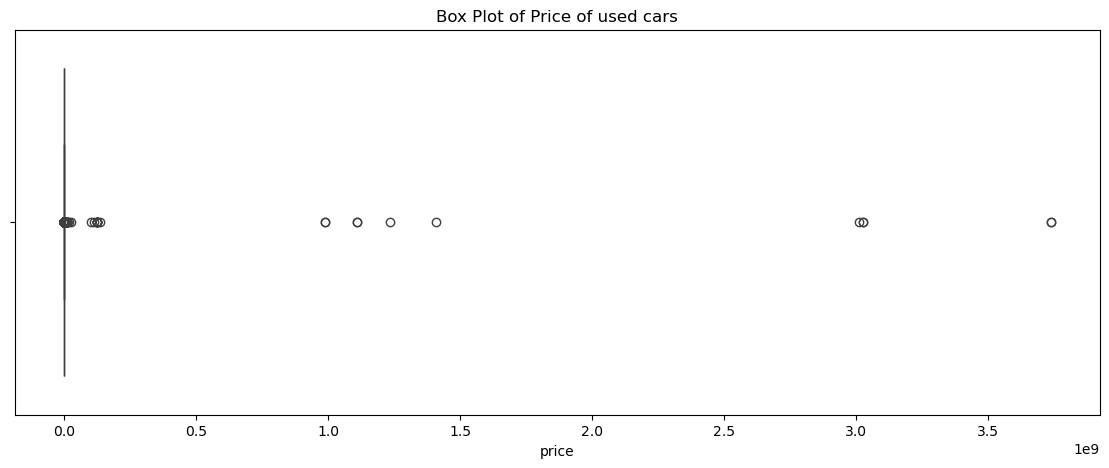

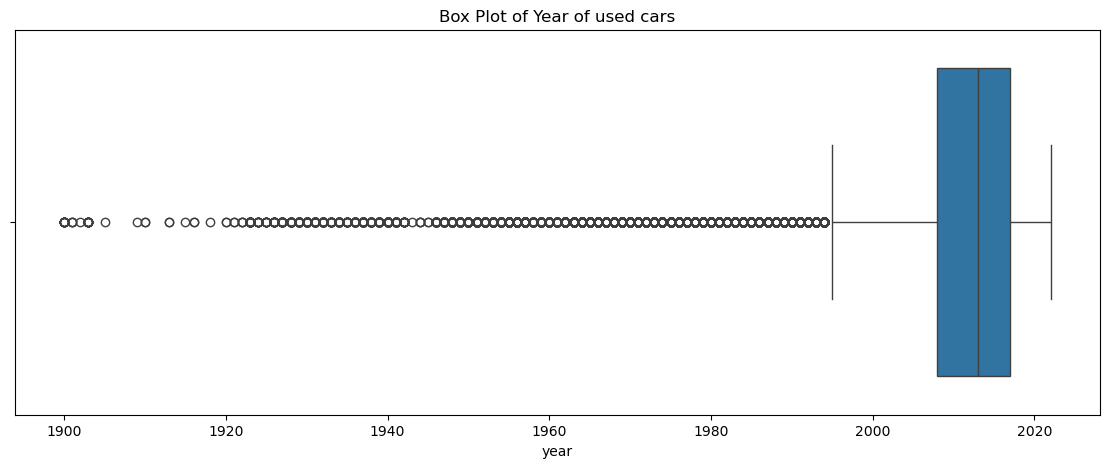

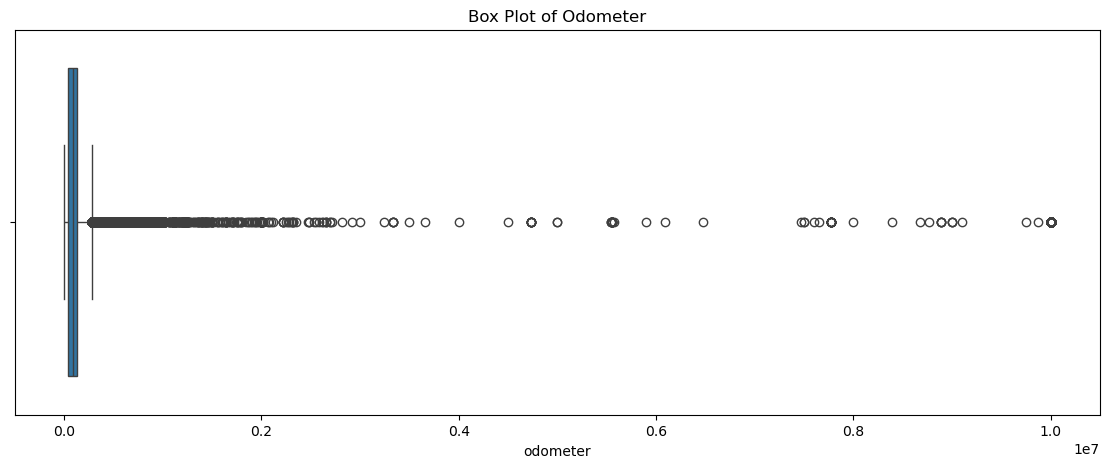

In [37]:
#Checking data for outliers 

#Box plot of 'price' to detect outlier
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='price').set(title="Box Plot of Price of used cars")

#Box plot of 'year' to detect outlier
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='year').set(title="Box Plot of Year of used cars")

#Box plot of 'Odometer' to detect outlier
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='odometer').set(title="Box Plot of Odometer")



luxury_level
nonluxury            326237
luxury                54024
affordableluxury      28701
harley motorcycle       153
ultraluxury             119
Name: count, dtype: int64


(array([-1.e+09,  0.e+00,  1.e+09,  2.e+09,  3.e+09,  4.e+09]),
 [Text(-1000000000.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1000000000.0, 0, '1'),
  Text(2000000000.0, 0, '2'),
  Text(3000000000.0, 0, '3'),
  Text(4000000000.0, 0, '4')])

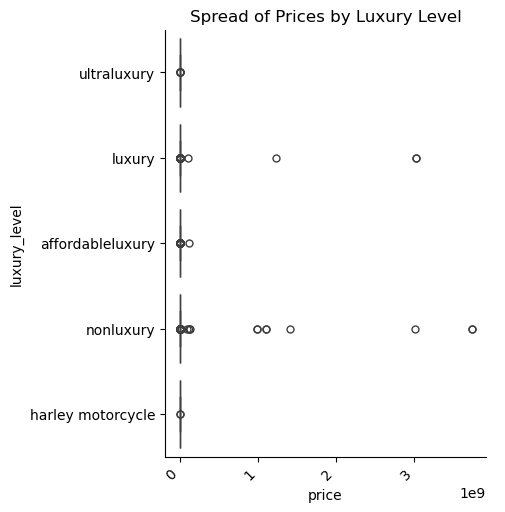

In [38]:
#Price of a luxury vehicle will always be higher than a normal one & same needs to be differentiated

#Categorize manufacturers by luxury level
luxury_level = {'ultraluxury': ['aston-martin', 'ferrari' ],
            'luxury': ['mercedes-benz', 'bmw', 'audi', 'porsche', 'alfa-romeo', 'jaguar', 'land rover', 'tesla', 'cadillac', 'volvo', \
                       'mini', 'rover', 'morgan'],
            'affordableluxury': ['lincoln', 'buick', 'acura', 'infiniti', 'lexus'],
            'nonluxury': ['ford', 'chevrolet', 'jeep', 'gmc', 'ram', 'dodge', 'chrysler', 'pontiac', 'mercury', 'saturn', 'fiat',\
                          'volkswagen', 'toyota', 'honda', 'nissan','hyundai', 'subaru', 'kia', 'mazda', 'mitsubishi', 'datsun'],
                'harley motorcycle': ['harley-davidson'],
            'unknown': ['other']}

#function to find the dictionary key for a given value
def find_key(value):
    for key, values in luxury_level.items():
        if value in values:
            return key
    return None

df['luxury_level'] = df['manufacturer'].apply(find_key)
print(df['luxury_level'].value_counts().sort_values(ascending = False))

#Plotting the data
sns.catplot(df, x = 'price', y = 'luxury_level', kind = 'box', \
            order = ['ultraluxury', 'luxury', 'affordableluxury', 'nonluxury', 'harley motorcycle']).set(title = 'Spread of Prices by Luxury Level')
plt.xticks(rotation = 45, ha = 'right')

[Text(0.5, 1.0, 'Odometer vs Price (By luxury level and year)')]

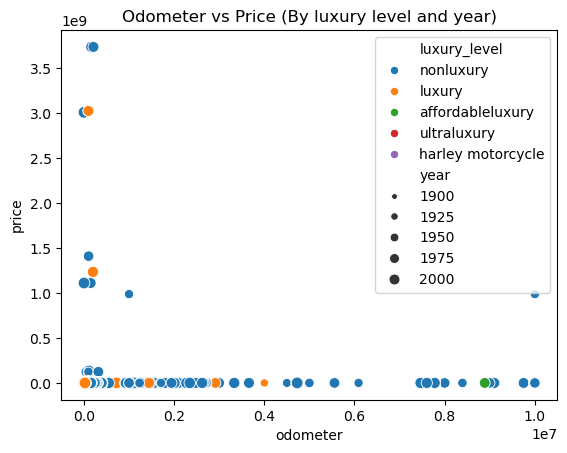

In [39]:
#Plotting relationship between luxury level, odometer & price
sns.scatterplot(x='odometer', y='price', hue = 'luxury_level', size = 'year', data = df).set(title = 'Odometer vs Price (By luxury level and year)')

In [40]:
#Exploring object features for further evaluation
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print('\n-----------\n')
    print(df_[col].nunique())
    print(df_[col].unique()) # to print name of categories only
    print(df_[col].value_counts()) # to print count under every category


-----------

404
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colora

In [41]:
#Some of the observations for factors affecting the car prices are as under:-
#There is a negative correlation between price and 'odometer'; lower odometer reading results in higher price.
#Sedans and SUV are among the most popular models with a large number of resales; whereas, SUV and pickup are more expensive.
#Mercedes, Volvo, Toyota and Jeep are sold at a higher price as compared to others.
#Diesel cars are more expensive; however, gas cars are most sold object in the inventory as compared to diesel or electric.



In [42]:
#There is a need to further data cleaning before modelling and hence following steps are needed:-

#1. 'id', 'VIN' & 'state' columns can be removed as they are not going to provide any worthy info about price.
#2. To address missing values in categorical columns, several regression estimators like BayesianRidge, DecisionTreeRegressor, ExtraTreesRegressor, and KNeighboursRegressor. After evaluating their performance, BayesianRidge yielded the lowest Mean Squared Error (MSE), and the same was used to impute missing values in categorical columns.
#3. Outliers were identified in the "Price," "Odometer," and "Year" columns using the Interquartile Range (IQR) method. A total of 62,427 rows needs to be removed during the outlier removal process for these columns.
#4. Data cleaning methods applied to the cars dataset - Replace Nan values, Remove any duplicates, Drop columns & Drop na values.
#5. 'year' column is converted into the 'age' of the car Drop the columns unused for machine learning


In [43]:
# Dropping Features

# 'VIN' and 'id' are not relevant in determining car prices, therefore, being dropped.
# 'Size' of car could be a good predictor for car price, however almost 70% of data missing for size feature in the dataset.
# 'Region' feature has 404 unique values with each category having less that 1% of total count; thus being dropped. 
# 'State' and 'Model' also exhibits similar characteristics to Region mentioned above, hence not being included.

# Dropping id, VIN, state, size & region
data_df = df.drop(columns=['id', 'model', 'VIN', 'state','size','region'], axis=1)
data_df.reset_index(inplace=True, drop = True)
data_df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,odometer_bin,luxury_level
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,"(-10000.0, 1000000.0]",nonluxury
426876,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,"(-10000.0, 1000000.0]",luxury
426877,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,"(-10000.0, 1000000.0]",luxury
426878,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,"(-10000.0, 1000000.0]",affordableluxury


In [44]:
# Dropping rows with null values
data_df = data_df.dropna()

In [45]:
# convert the year column into the age column 
current_year = 2025
data_df['age'] = current_year - data_df['year']
data_df.drop(columns = ['year'], inplace = True)


In [46]:
# dropping unnecessary columns
data_df

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,odometer_bin,luxury_level,age
31,15000,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,"(-10000.0, 1000000.0]",nonluxury,12.0
32,27990,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,"(-10000.0, 1000000.0]",nonluxury,13.0
33,34590,chevrolet,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,"(-10000.0, 1000000.0]",nonluxury,9.0
34,35000,toyota,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,"(-10000.0, 1000000.0]",nonluxury,6.0
35,29990,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,"(-10000.0, 1000000.0]",nonluxury,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,cadillac,good,6 cylinders,gas,7701.0,clean,other,fwd,other,black,"(-10000.0, 1000000.0]",luxury,5.0
426860,39990,infiniti,good,8 cylinders,gas,41664.0,clean,automatic,4wd,other,black,"(-10000.0, 1000000.0]",affordableluxury,8.0
426866,32990,infiniti,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,"(-10000.0, 1000000.0]",affordableluxury,9.0
426874,33590,lexus,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white,"(-10000.0, 1000000.0]",affordableluxury,7.0


In [47]:
#Converting 'condition' and 'cylinders' categorical features into numerical features while preserving ordinal ranking

map_condition = {'new': 5, 'like new': 4, 'excellent': 3, 'good' : 2, 'fair' : 1, 'salvage': 0}
map_cylinders = {'12 cylinders' : 12, '10 cylinders' : 10, '8 cylinders' : 8, '6 cylinders' : 6, '5 cylinders' : 5, '4 cylinders' : 4, '3 cylinders' : 3, 'other': 1}

In [48]:
data_df['condition'] = data_df['condition'].map(map_condition)

In [49]:
data_df['cylinders'] = data_df['cylinders'].map(map_cylinders)

In [50]:
# Filtering out & removing car price set or entered equal to 0 (zero)
data_df = data_df[data_df['price'] != 0]

In [51]:
#One hot encode categorical features

ohe_features = ['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']

df_final = pd.get_dummies(data_df, columns=ohe_features)


In [52]:
df_final

,price,condition,cylinders,odometer,odometer_bin,luxury_level,age,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
31,15000,3,6,128000.0,"(-10000.0, 1000000.0]",nonluxury,12.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32,27990,2,8,68696.0,"(-10000.0, 1000000.0]",nonluxury,13.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,34590,2,6,29499.0,"(-10000.0, 1000000.0]",nonluxury,9.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
34,35000,3,6,43000.0,"(-10000.0, 1000000.0]",nonluxury,6.0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
35,29990,2,6,17302.0,"(-10000.0, 1000000.0]",nonluxury,9.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,2,6,7701.0,"(-10000.0, 1000000.0]",luxury,5.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426860,39990,2,8,41664.0,"(-10000.0, 1000000.0]",affordableluxury,8.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426866,32990,2,8,55612.0,"(-10000.0, 1000000.0]",affordableluxury,9.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426874,33590,2,6,30814.0,"(-10000.0, 1000000.0]",affordableluxury,7.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [53]:
#Removing Outliers from price and odometer features that can skew the results and choosing a subset of the data sufficient for predicting car prices.
#Using min, median, and max values for each respective feature and exploring the lower bound and upper bounds using IQR.

# Maximum, Minimum, Std dev and Mean value of price in the dataframe df_price_out1
print('Max:', data_df['price'].max())
print('Min:', data_df['price'].min())
print('Mean:', data_df['price'].mean())
print('Std. Dev.:', data_df['price'].std())

# Exploring lower bound and upper bound using Interquartile Range (IQR)  
Q1 = data_df['price'].quantile(0.25)
Q3 = data_df['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound_price = Q1 - 1.5 * IQR
upper_bound_price = Q3 + 1.5 * IQR

# Filter the DataFrame to retain only values within the lower and upper bounds
print('Lower bound: ', lower_bound_price)
print('Upper bound: ', upper_bound_price)


Max: 3736928711
Min: 1
Mean: 63181.27946913011
Std. Dev.: 11627111.074620418
Lower bound:  -20242.5
Upper bound:  49737.5


In [54]:
#Dropping any observation outside of 3x std dev 
df_price_out2 = data_df[(data_df['price'] < 200000) & (data_df['price'] > 0)]

[Text(0.5, 1.0, 'Box Plot of Price of used cars in the dataset after eliminating outliers')]

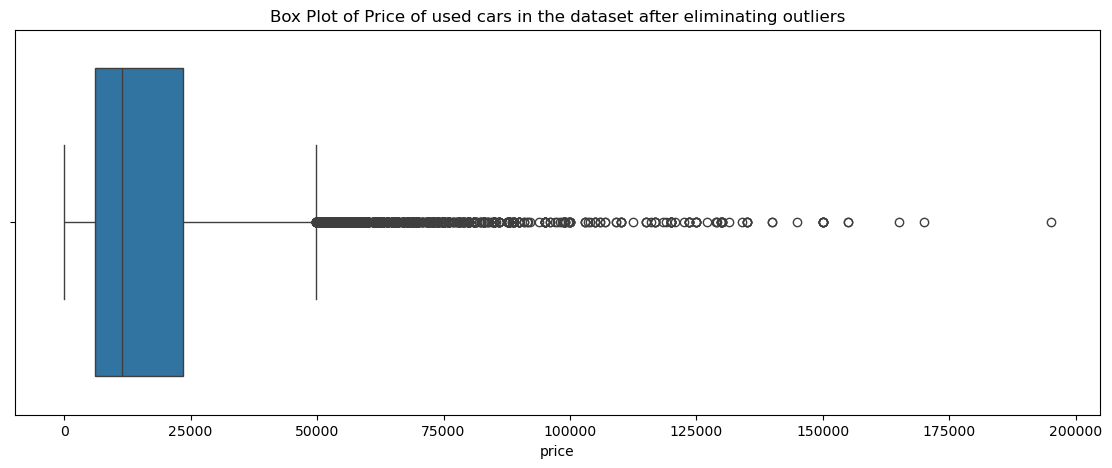

In [55]:
#Box plot of 'price' after eliminating outliers 
plt.figure(figsize=(14,5))
sns.boxplot(data=df_price_out2,x='price').set(title="Box Plot of Price of used cars in the dataset after eliminating outliers")

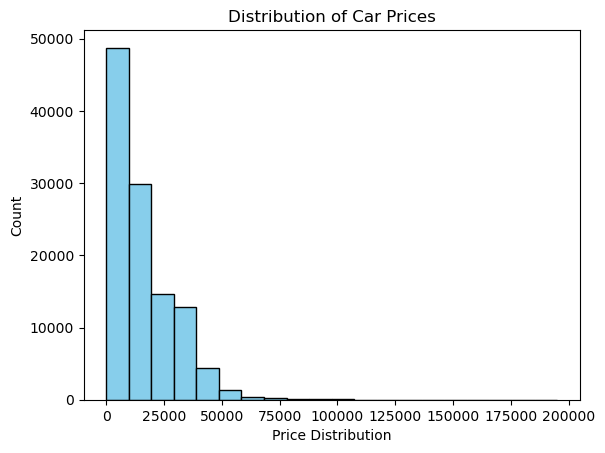

In [56]:
# Visualizing distribution of Car Prices after removing outliers
df_price_out2['price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price Distribution')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.show()

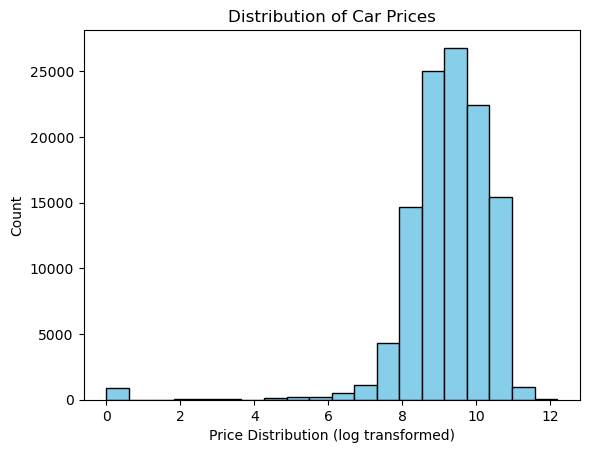

In [57]:
# Applying log transformation and viewing distribution
np.log(df_price_out2['price']).plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price Distribution (log transformed)')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.show()

In [58]:
data_df_clean1 = df_price_out2

In [59]:
#Dropping any observation outside of 500000 Kms 
df_odom_out1 = data_df_clean1
# Maximum, Minimum, Std dev and Mean value of odometer in the dataframe df1
print('Max:', df_odom_out1['odometer'].max())
print('Min:', df_odom_out1['odometer'].min())
print('Mean:', df_odom_out1['odometer'].mean())
print('Median:', df_odom_out1['odometer'].median())
print('Std. Dev.:', df_odom_out1['odometer'].std())

# Exploring lower bound and upper bound using Interquartile Range (IQR)   
Q1 = data_df_clean1['odometer'].quantile(0.25)
Q3 = data_df_clean1['odometer'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound_odometer = Q1 - 1.5 * IQR
upper_bound_odometer = Q3 + 1.5 * IQR

# Filter the DataFrame to retain only values within the lower and upper bounds
print('Lower bound: ', lower_bound_odometer)
print('Upper bound: ', upper_bound_odometer)

Max: 10000000.0
Min: 0.0
Mean: 111525.93168175491
Median: 103257.0
Std. Dev.: 192419.0455183563
Lower bound:  -82714.0
Upper bound:  287390.0


In [60]:
#Dropping any observation outside of 3x std. dev. 
df_odom_out2 = df_odom_out1[(df_odom_out1['odometer'] < upper_bound_odometer)]

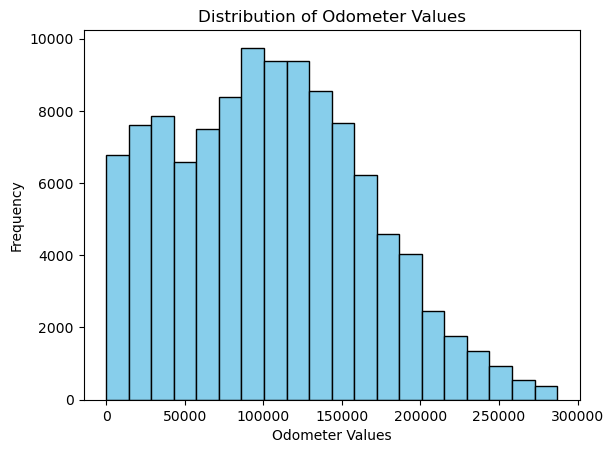

In [61]:
# Visualizing distribution of odometer after removing outliers
df_odom_out2['odometer'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Odometer Values')
plt.ylabel('Frequency')
plt.title('Distribution of Odometer Values')
plt.show()


[Text(0.5, 1.0, 'Box Plot of Age of used cars in the dataset')]

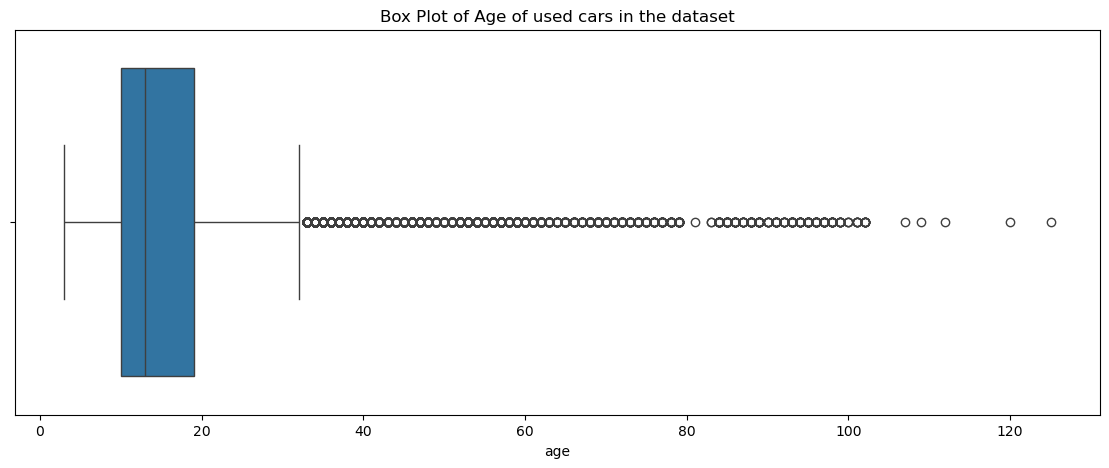

In [62]:
#box plot of 'age' to visualize outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=df_odom_out2,x='age').set(title="Box Plot of Age of used cars in the dataset")

In [63]:
#Renaming final dataframe
df_clean = df_odom_out2

In [64]:
df_clean.head()

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,odometer_bin,luxury_level,age
31,15000,ford,3,6,gas,128000.0,clean,automatic,rwd,truck,black,"(-10000.0, 1000000.0]",nonluxury,12.0
32,27990,gmc,2,8,gas,68696.0,clean,other,4wd,pickup,black,"(-10000.0, 1000000.0]",nonluxury,13.0
33,34590,chevrolet,2,6,gas,29499.0,clean,other,4wd,pickup,silver,"(-10000.0, 1000000.0]",nonluxury,9.0
34,35000,toyota,3,6,gas,43000.0,clean,automatic,4wd,truck,grey,"(-10000.0, 1000000.0]",nonluxury,6.0
35,29990,chevrolet,2,6,gas,17302.0,clean,other,4wd,pickup,red,"(-10000.0, 1000000.0]",nonluxury,9.0


In [65]:
#Displaying percentage of null values present for each feature
df_clean.isna().sum()/df_clean.shape[0]*100

price           0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
odometer_bin    0.0
luxury_level    0.0
age             0.0
dtype: float64

In [66]:
df_final

,price,condition,cylinders,odometer,odometer_bin,luxury_level,age,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
31,15000,3,6,128000.0,"(-10000.0, 1000000.0]",nonluxury,12.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32,27990,2,8,68696.0,"(-10000.0, 1000000.0]",nonluxury,13.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,34590,2,6,29499.0,"(-10000.0, 1000000.0]",nonluxury,9.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
34,35000,3,6,43000.0,"(-10000.0, 1000000.0]",nonluxury,6.0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
35,29990,2,6,17302.0,"(-10000.0, 1000000.0]",nonluxury,9.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,2,6,7701.0,"(-10000.0, 1000000.0]",luxury,5.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426860,39990,2,8,41664.0,"(-10000.0, 1000000.0]",affordableluxury,8.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426866,32990,2,8,55612.0,"(-10000.0, 1000000.0]",affordableluxury,9.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426874,33590,2,6,30814.0,"(-10000.0, 1000000.0]",affordableluxury,7.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [68]:
# In this section, we will be building three models to compare and use the best model to get the feature importance for used car prices.

# Linear Regression
# Lasso Regression with GridSearchCV
# Ridge Regression with GridSearchCV



In [69]:
# Separating features and target variable
X = df_final.drop(columns=['price'])
y = df_final['price']

# Split the dataset into training and test sets (with log-transformed target)
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), random_state=42, shuffle=True)

# Extract midpoints from interval objects
def extract_midpoints(df):
    # Apply midpoint extraction element-wise
    return df.applymap(lambda x: x.mid if isinstance(x, pd.Interval) else x)

# Debug if any columns contain intervals
for col in X_train.columns:
    if any(isinstance(val, pd.Interval) for val in X_train[col]):
        print(f"Column '{col}' contains interval values.")

# Applying the midpoint extraction
X_train = extract_midpoints(X_train)
X_test = extract_midpoints(X_test)

# Identify categorical columns (columns with string values)
categorical_cols = []
for col in X_train.columns:
    if X_train[col].dtype == 'object':  
        categorical_cols.append(col)
        print(f"Categorical column detected: {col}")

# Use one-hot encoding for categorical columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        # Changed 'sparse' to 'sparse_output' to match newer scikit-learn versions
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)



Column 'odometer_bin' contains interval values.
Categorical column detected: luxury_level


In [70]:
X_train

,condition,cylinders,odometer,odometer_bin,luxury_level,age,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
1093,2,6,186500.0,495000.0,nonluxury,30.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
78392,3,8,84277.0,495000.0,nonluxury,14.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
159563,2,4,48535.0,495000.0,luxury,10.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
275300,3,4,31444.0,495000.0,nonluxury,17.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
229763,3,6,50100.0,495000.0,nonluxury,9.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285403,2,4,105099.0,495000.0,nonluxury,12.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
418593,3,4,68319.0,495000.0,nonluxury,13.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
388539,3,6,64329.0,495000.0,nonluxury,15.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3669,4,6,147909.0,495000.0,nonluxury,15.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
# 1. Linear Regression - Building a pipeline for the linear regression

from sklearn.metrics import mean_absolute_error
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessor with different transformers for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)  # Changed 'sparse' to 'sparse_output'
    ])

# Create the pipeline with the preprocessor
Linear_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('linear', LinearRegression())
])

# Perform Linear regression on the data
Linear_pipe.fit(X_train, y_train)
train_predict = Linear_pipe.predict(X_train)
test_predict = Linear_pipe.predict(X_test)

# Regression Error
Linear_train_mse = mean_squared_error(train_predict, y_train)
Linear_test_mse = mean_squared_error(test_predict, y_test)
Linear_train_mae = mean_absolute_error(train_predict, y_train)
Linear_test_mae = mean_absolute_error(test_predict, y_test)

# Check
# Note: Accessing coefficients is different now due to the preprocessing step
print(Linear_pipe)

# The coefficients are now more complex due to one-hot encoding
# You may need to map them back to feature names if needed
linear_model = Linear_pipe.named_steps['linear']
print("Model coefficients shape:", linear_model.coef_.shape)

print(f"Linear Model: train_mse={Linear_train_mse}, test_mse={Linear_test_mse}")
print(f"Linear Model: train_mae={Linear_train_mae}, test_mae={Linear_test_mae}")
print(Linear_pipe.score(X_test, y_test))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['condition', 'cylinders',
                                                   'odometer', 'age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['odometer_bin',
                                                   'luxury_level'])])),
                ('linear', LinearRegression())])
Model coefficients shape: (16,)
Linear Model: train_mse=1.2819130321851426, test_mse=1.309665476148133
Linear Model: train_mae=0.574518183733983, test_mae=0.5762566329653449
0.18128482506751087


In [72]:
#Observations:-

#The Linear Regression model shows poor performance on this dataset.
#The R² score on the test set is approximately 20.2%, indicating that the model is able to explain only about 20% of the variance in the log-transformed used car prices. This is significantly low for a regression model and suggests that the linear assumptions do not capture the complexity of the data.
#Additionally, the Mean Squared Error (MSE) on the test set is 1.276, and the Mean Absolute Error (MAE) is 0.583, both of which are relatively high. These high error values reinforce that the model's predictions are not accurate or reliable for estimating used car prices.
#Given the low R² and high error values, we can conclude that Linear Regression is not suitable for this problem, and we should explore more advanced or non-linear models like Random Forests, Gradient Boosting, or XGBoost for better performance.

In [73]:
#2. Lasso Regression Model with GridSearchCV

# First, we need to handle categorical variables using one-hot encoding or label encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X_train and X_test are pandas DataFrames
# Identify categorical columns (columns with string values like 'nonluxury')
# Replace this with your actual categorical column names
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessor with appropriate transformers for different column types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Create the pipeline with preprocessing and Lasso
Lasso3_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

# Specifying alpha values to try out when using GridSearchCV
lasso_param_dict = {'lasso__alpha': [0.01, 0.1, 1, 10]}

# Using GridSearchCV to find the optimal value for alpha
lasso_grid = GridSearchCV(Lasso3_pipe, param_grid=lasso_param_dict, cv=5)
lasso_grid.fit(X_train, y_train)
train_predict = lasso_grid.predict(X_train)
test_predict = lasso_grid.predict(X_test)

# Regression Error
Lasso3_train_mse = mean_squared_error(train_predict, y_train)
Lasso3_test_mse = mean_squared_error(test_predict, y_test)
Lasso3_train_mae = mean_absolute_error(train_predict, y_train)
Lasso3_test_mae = mean_absolute_error(test_predict, y_test)

print(f"Lasso Model: train_mse={Lasso3_train_mse}, test_mse={Lasso3_test_mse}")
print(f"Lasso Model: train_mae={Lasso3_train_mae}, test_mae={Lasso3_test_mae}")
print(lasso_grid.score(X_test, y_test))

Lasso Model: train_mse=1.3869250977428818, test_mse=1.4249215229391998
Lasso Model: train_mae=0.6644767744913712, test_mae=0.6685410632902602
0.10923446088741207


In [74]:
# Extracting best estimator (pipeline)
best_estimator_lasso = lasso_grid.best_estimator_

# Extracting model step from best estimator
best_model_lasso = best_estimator_lasso.named_steps['lasso']

feature_names = X_train.columns

# Extracting feature coefficients
coefs_lasso = best_model_lasso.coef_

print(coefs_lasso)  

[ 0.08542641  0.26680126 -0.13319282 -0.29237101  0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.02606794  0.01762557  0.        ]


In [75]:
best_model_lasso

Lasso(alpha=0.01)

In [76]:
# Assessing model using cross-validation using cross_val_score 
# Setting cv = 5, performing 5-fold cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X_train contains categorical columns including one with 'nonluxury' values
# First, identify categorical columns in your dataset
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a preprocessor that handles both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ])

# Create a pipeline that first preprocesses the data, then applies the Lasso model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model_lasso)
])

# Now use the pipeline in cross-validation
cv_scores_lasso = cross_val_score(pipeline, X_train, y_train, cv=5)

mean_cv_score_lasso = np.mean(cv_scores_lasso)

print("Cross-validation scores: ", cv_scores_lasso)
print("Mean cross-validation score: ", mean_cv_score_lasso)

Cross-validation scores:  [0.11033064 0.12302553 0.11864166 0.12357005 0.12070854]
Mean cross-validation score:  0.11925528405203234


In [77]:
# Creating dataframe for coefficients & adding a third column that displays magnitude of the coefficients in descending order
coeff_lasso_df = pd.DataFrame.from_dict({'feature_names': feature_names[:len(coefs_lasso)]})
# Add the coefficients as a column to the DataFrame
coeff_lasso_df['coef'] = coefs_lasso  # Adding the coefficients as a column
coeff_lasso_df['abs_coef'] = abs(coeff_lasso_df['coef'])  # Use bracket notation to access the column
coeff_lasso_df = coeff_lasso_df.sort_values(by='abs_coef', ascending=False)
coeff_lasso_df.head(25)

,feature_names,coef,abs_coef
3,odometer_bin,-0.292371,0.292371
1,cylinders,0.266801,0.266801
2,odometer,-0.133193,0.133193
0,condition,0.085426,0.085426
13,manufacturer_chevrolet,-0.026068,0.026068
14,manufacturer_chrysler,0.017626,0.017626
4,luxury_level,0.000000,0.000000
5,age,0.000000,0.000000
6,manufacturer_acura,0.000000,0.000000
7,manufacturer_alfa-romeo,0.000000,0.000000


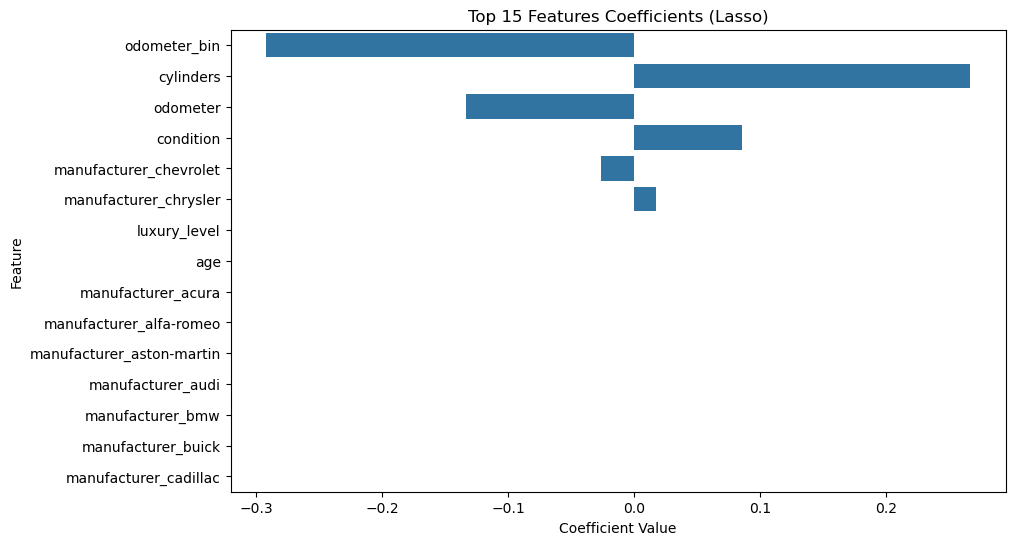

In [78]:
top_15_coeff_lasso = coeff_lasso_df.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x = 'coef', y = 'feature_names', data = top_15_coeff_lasso, orient = 'h')
plt.title('Top 15 Features Coefficients (Lasso)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [79]:
# Examining Feature Importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_estimator_lasso, X_train, y_train, n_repeats=10, random_state=42)

# Get the feature importances
feature_importances_lasso = perm_importance.importances_mean

# Get the indices of features sorted by importance
sorted_idx = np.argsort(feature_importances_lasso)[::-1]

# Create dataframe for feature and corresponding importance value
lasso_feature_importance_df = pd.DataFrame({'Feature': X.columns[sorted_idx],
                                      'Importance': feature_importances_lasso[sorted_idx]})

In [80]:
# Observations from Lasso Coefficients:

# Odometer readings (odometer, odometer_bin) are the most influential features, with strong negative and positive coefficients respectively, indicating that mileage plays a critical role in price prediction.
# Vehicle age also shows a negative impact on price, confirming that older cars tend to have lower resale values.
# Body type and drive type (e.g., type_sedan, type_wagon, drive_fwd, drive_rwd) significantly influence pricing, with sedans and wagons associated with lower values.
#Fuel type shows mixed influence — fuel_gas and fuel_diesel both contribute, but with smaller coefficients, suggesting moderate impact.
#Vehicle condition and cylinder count are positively correlated with price, aligning with market expectations.
#Certain manufacturers (e.g., bmw, toyota, nissan, dodge) have brand-specific effects, where luxury brands like BMW are associated with a slight price reduction — potentially due to depreciation.
#Title status and paint colours (e.g., parts only, missing, black, silver) have minor but non-negligible impact, indicating that visual and legal factors also affect pricing perception.

In [81]:
#3. Ridge Regression with GridSearch CV

# First, we need to handle categorical variables before feeding data to the model
# Convert categorical variables to numeric using one-hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns (this is an example - adjust based on your actual data)
# Assuming 'nonluxury' is in a column that should be treated as categorical
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Specifying alpha values to try out when using GridSearchCV
ridge_param_dict = {'ridge__alpha': np.logspace(0, 5, 50)}

# Building a pipeline for the ridge regression that includes preprocessing
Ridge_Poly3_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

# Using GridSearchCV to find the optimal value for alpha
ridge_grid = GridSearchCV(Ridge_Poly3_pipe, param_grid=ridge_param_dict, cv=5)
ridge_grid.fit(X_train, y_train)

# Perform ridge regression on the data
train_predict = ridge_grid.predict(X_train)
test_predict = ridge_grid.predict(X_test)

# Regression Error
Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Ridge3_test_mae = mean_absolute_error(test_predict, y_test)

print(f"Ridge Degree 3 Model: train_mse={Ridge3_train_mse}, test_mse={Ridge3_test_mse}")
print(f"Ridge Degree 3 Model: train_mae={Ridge3_train_mae}, test_mae={Ridge3_test_mae}")
Ridge_Poly3_pipe

Ridge Degree 3 Model: train_mse=1.1510193227567487, test_mse=1.192935370965962
Ridge Degree 3 Model: train_mae=0.5112710347816558, test_mae=0.5188892318992117


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['condition', 'cylinders',
                                                   'odometer', 'odometer_bin',
                                                   'age', 'manufacturer_acura',
                                                   'manufacturer_alfa-romeo',
                                                   'manufacturer_aston-martin',
                                                   'manufacturer_audi',
                                                   'manufacturer_bmw',
                                                   'manufacturer_buick',
                                                   'manufacturer_cadillac',
                                                   'manufacturer_chevrolet',
                                                   'manufacturer_chrysle...
                                                   'manufacturer_ford',
                                                   'manufacturer_gmc',
                                                   'manufacturer_harley-davidson',
                                                   'manufacturer_honda',
                                                   'manufacturer_hyundai',
                                                   'manufacturer_infiniti',
                                                   'manufacturer_jaguar',
                                                   'manufacturer_jeep',
                                                   'manufacturer_kia',
                                                   'manufacturer_land rover',
                                                   'manufacturer_lexus',
                                                   'manufacturer_lincoln', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['luxury_level'])])),
                ('ridge', Ridge())])

In [82]:
# extracting best estimator (pipeline)
best_estimator_ridge = ridge_grid.best_estimator_

# extract model step from best estimator
best_model_ridge = best_estimator_ridge.named_steps['ridge']

feature_names = X_train.columns

# extract feature coefficients
coefs_ridge = best_model_ridge.coef_

In [83]:
best_model_ridge

Ridge(alpha=13.257113655901096)

In [84]:
# First, we need to encode categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns (columns with string values like 'nonluxury')
# This is an example - you'll need to identify your actual categorical columns
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model_ridge)
])

# Now use the pipeline in cross-validation
cv_scores_ridge = cross_val_score(pipeline, X_train, y_train, cv=5)

mean_cv_score_ridge = np.mean(cv_scores_ridge)

print("Cross-validation scores: ", cv_scores_ridge)
print("Mean cross-validation score: ", mean_cv_score_ridge)

Cross-validation scores:  [0.24765572 0.27630481 0.26309282 0.27641975 0.27482519]
Mean cross-validation score:  0.2676596596289561


In [85]:
# Fit pipeline to entire training data
pipeline.fit(X_train, y_train)

# Get the coefficients from the fitted Ridge model
coefs_ridge = pipeline.named_steps['model'].coef_

# Get feature names from the preprocessor
# Numerical columns remain unchanged
numerical_features = numerical_cols

# Get one-hot encoded column names from the encoder
categorical_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine all feature names
feature_names = list(numerical_features) + list(categorical_features)

# Create the DataFrame using the correct feature names and coefficients
coeff_ridge_df = pd.DataFrame({
    'feature_names': feature_names,
    'coef': coefs_ridge
})

# Add magnitude column and sort
coeff_ridge_df['abs_coef'] = abs(coeff_ridge_df['coef'])
coeff_ridge_df = coeff_ridge_df.sort_values(by='abs_coef', ascending=False)

# Show top 25 influential features
print(coeff_ridge_df.head(50))


                     feature_names      coef  abs_coef
55         title_status_parts only -0.941670  0.941670
76                      type_wagon -0.636300  0.636300
53               title_status_lien  0.509755  0.509755
71                      type_other  0.431165  0.431165
41             manufacturer_saturn -0.388492  0.388492
65                        type_bus -0.379546  0.379546
38            manufacturer_porsche  0.373507  0.373507
52              title_status_clean  0.365914  0.365914
54            title_status_missing -0.342882  0.342882
47                     fuel_diesel  0.342385  0.342385
32            manufacturer_mercury -0.338752  0.338752
9                 manufacturer_bmw -0.336152  0.336152
70                    type_offroad  0.329363  0.329363
49                        fuel_gas -0.318906  0.318906
72                     type_pickup  0.313273  0.313273
73                      type_sedan -0.309237  0.309237
93        luxury_level_ultraluxury  0.299164  0.299164
56        

In [86]:
top_15_coeff_ridge = coeff_ridge_df.head(30)

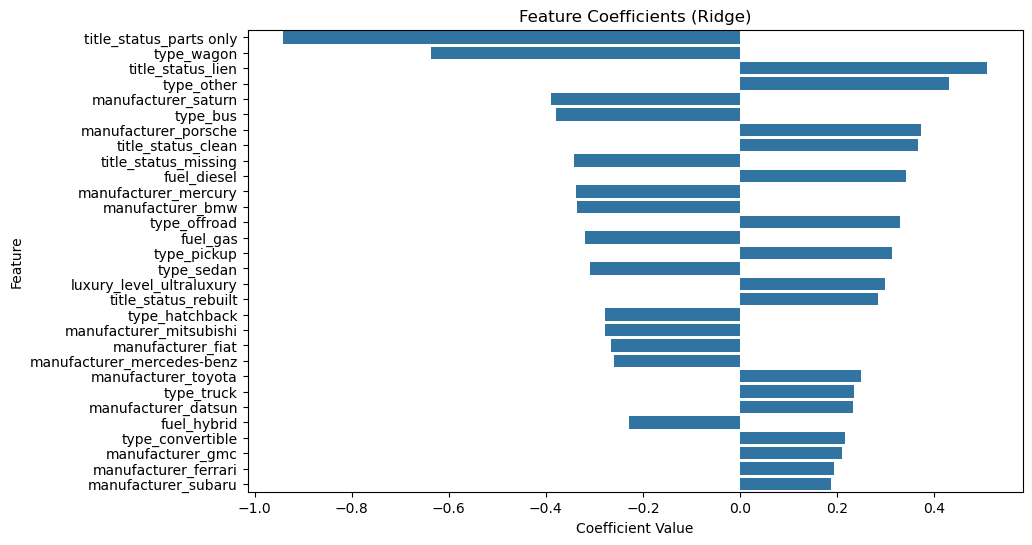

In [87]:
# Visualizing Feature Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x = 'coef', y = 'feature_names', data = top_15_coeff_ridge, orient = 'h')
plt.title('Feature Coefficients (Ridge)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [88]:
# Examining Feature Importance
perm_importance = permutation_importance(best_estimator_ridge, X_train, y_train, n_repeats = 10, random_state = 42)

# Get the feature importances
feature_importances_ridge = perm_importance.importances_mean

# Get the indices of features sorted by importance
sorted_idx = np.argsort(feature_importances_ridge)[::-1]

# Create dataframe for feature and corresponding importance value
ridge_feature_importance_df = pd.DataFrame({'Feature': X.columns[sorted_idx],
                                      'Importance': feature_importances_ridge[sorted_idx]})

In [89]:
ridge_feature_importance_df.head(25)

,Feature,Importance
0,title_status_clean,0.138273
1,title_status_rebuilt,0.119016
2,title_status_lien,0.090767
3,type_wagon,0.068525
4,type_other,0.066853
5,manufacturer_subaru,0.054733
6,manufacturer_toyota,0.043544
7,title_status_salvage,0.027954
8,luxury_level,0.027905
9,condition,0.024199


In [90]:
# Create new data frame with top 15 important features
top_15_important_feat_ridge = ridge_feature_importance_df.head(15)

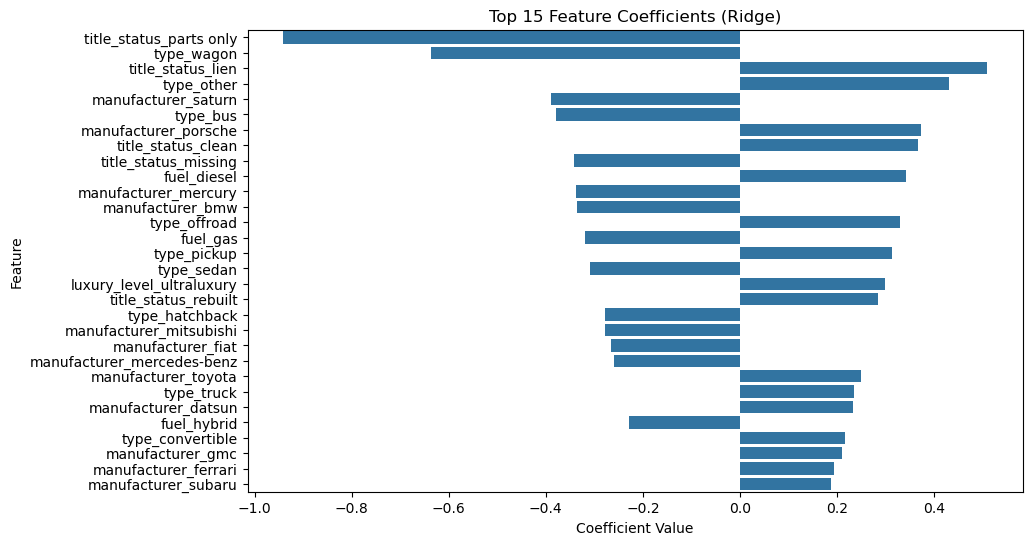

In [91]:
# Visualizing Feature Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x = 'coef', y = 'feature_names', data = top_15_coeff_ridge, orient = 'h')
plt.title('Top 15 Feature Coefficients (Ridge)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [92]:
#Observations from Ridge regression

#Odometer and odometer_bin remain the most influential predictors, with strong and opposite directional impacts. This reaffirms that vehicle mileage plays a critical role in determining resale value.
#Vehicle age continues to show a negative association with price, as expected.
#Body types such as type_sedan, type_pickup, type_wagon, and type_truck contribute meaningfully, highlighting the impact of vehicle form on buyer preference and pricing.
#Fuel type features (fuel_diesel, fuel_gas, fuel_hybrid, fuel_other) all show varying degrees of influence, with diesel generally increasing and gas slightly decreasing price.
#Drive type (drive_fwd, drive_rwd, drive_4wd) coefficients suggest functional attributes of the vehicle matter to buyers.
#Vehicle condition, cylinders, and manufacturer variables (e.g., toyota, bmw, nissan, dodge, etc.) show a range of positive and negative effects, offering insight into how both brand and engine specifications influence resale value.
#Title status and paint colour (e.g., parts only, missing, black, silver, green, etc.) have smaller coefficients but still affect pricing — useful for refining pricing strategies or buyer recommendations.

In [93]:
# Trying model with Multiple linear regression on odometer, age, and dummy variables for lux and type (no scaling of features)

np.random.seed(42)
n_samples = 100
df = pd.DataFrame({
    'price': np.random.exponential(50000, n_samples),
    'odometer': np.random.normal(50000, 20000, n_samples),
    'age': np.random.randint(1, 15, n_samples),
    'luxury_level': np.random.choice([0, 1], n_samples),
    'type': np.random.choice(['sedan', 'suv', 'truck'], n_samples)
})

# Create dummy variables for categorical features
df_with_dummies = pd.get_dummies(df, columns=['type'], drop_first=True)

# Create the target variable (log-transformed price)
df_with_dummies['lny1'] = np.log(df_with_dummies['price'])

# Create feature matrix
superXlinear = df_with_dummies[['odometer', 'age', 'luxury_level', 'type_suv', 'type_truck']]
lny1 = df_with_dummies['lny1']

# Split data into train and test sets
from sklearn.model_selection import train_test_split
superXlinear_train, superXlinear_test, lny1_train, lny1_test = train_test_split(
    superXlinear, lny1, test_size=0.3, random_state=42)

# Trying model with Multiple linear regression on odometer, age, and dummy variables for lux and type
# Instantiate, fit, and predict:
model_superX = LinearRegression()
model_superX.fit(superXlinear_train, lny1_train)
y_pred_superX = model_superX.predict(superXlinear_test)  

# Evaluate the model
mse_superX = mean_squared_error(lny1_test, y_pred_superX)
mse_superX_train = mean_squared_error(lny1_train, model_superX.predict(superXlinear_train))
print(f"Mean Squared Error: {mse_superX}")
print("train MSE: ", mse_superX_train)

# Print the coefficients and intercept
print(f"Coefficients: {model_superX.coef_}")
print(f"Intercept: {model_superX.intercept_}")

results_superX_df = pd.DataFrame(zip(model_superX.feature_names_in_, model_superX.coef_))
print(results_superX_df)
print(" ")
print("intercept: ", model_superX.intercept_)

r_squared_superX = model_superX.score(superXlinear_test, lny1_test)
adjusted_r_squared_superX = 1 - (1-r_squared_superX)*(len(lny1_test)-1)/(len(lny1_test)-superXlinear_test.shape[1]-1)

print("R-squared: ",r_squared_superX)
print("Adjusted R-squared: ", adjusted_r_squared_superX)



Mean Squared Error: 2.9749344360046197
train MSE:  1.119583238664294
Coefficients: [-4.47657160e-06  7.64199960e-02 -2.27154796e-01  4.45923878e-01
 -1.02964762e-01]
Intercept: 9.825194062275774
              0         1
0      odometer -0.000004
1           age  0.076420
2  luxury_level -0.227155
3      type_suv  0.445924
4    type_truck -0.102965
 
intercept:  9.825194062275774
R-squared:  -0.16668573372201378
Adjusted R-squared:  -0.40974526158076663


In [94]:
#Exploring variations of above model by involving the complexity-control hyperparameter

#Ridge Regression GridSearchCV for alpha; using superXlinear as features
from sklearn.model_selection import GridSearchCV

ridgemodel_linear_gridsearch = Pipeline([
    ('MLR', Ridge())
])

parameters_to_try = {'MLR__alpha': 10**np.linspace(-5,4,100)}

ridge_model_finder = GridSearchCV(estimator = ridgemodel_linear_gridsearch, param_grid = parameters_to_try,
                            scoring = 'neg_mean_squared_error',cv = 5)
ridge_model_finder.fit(superXlinear_train, lny1_train)
ridge_model_finder.best_estimator_

feature_names = superXlinear_train.columns
ridgeresults_df = pd.DataFrame(zip(feature_names, ridge_model_finder.best_estimator_.named_steps["MLR"].coef_))

print(ridgeresults_df)
print(" ")
print("intercept: ", ridge_model_finder.best_estimator_.named_steps["MLR"].intercept_)



              0         1
0      odometer -0.000005
1           age  0.073006
2  luxury_level -0.177228
3      type_suv  0.322758
4    type_truck -0.102583
 
intercept:  9.905656222796392


In [95]:
ridge_model_finder.best_estimator_

Pipeline(steps=[('MLR', Ridge(alpha=5.336699231206313))])

In [96]:
ridge_model_finder.best_estimator_.named_steps["MLR"].alpha

5.336699231206313

In [97]:
#Evaluating the model
y_pred_ridgegrid_superXlinear = ridge_model_finder.predict(superXlinear_test) #I tried using .best_estimator_ for this but it resulted in TypeError: 'Pipeline' object is not callable.
mse_ridgegrid_superXlinear = mean_squared_error(lny1_test, y_pred_ridgegrid_superXlinear)
print(f"Mean Squared Error: {mse_ridgegrid_superXlinear}")
print("train MSE: ", mean_squared_error(lny1_train, ridge_model_finder.predict(superXlinear_train)))

Mean Squared Error: 2.928948908942258
train MSE:  1.1233105112751964


In [98]:
#Attempting LASSO regression GridSearchCV for alpha, using superXlinear as features

lassomodel_linear_gridsearch = Pipeline([
    ('MLR', Lasso())
])

parameters_to_try = {'MLR__alpha': 10**np.linspace(-5,4,100)}

lasso_model_finder = GridSearchCV(estimator = lassomodel_linear_gridsearch, param_grid = parameters_to_try,
                            scoring = 'neg_mean_squared_error',cv = 5)
lasso_model_finder.fit(superXlinear_train, lny1_train)
lasso_model_finder.best_estimator_

feature_names = superXlinear_train.columns
lassoresults_df = pd.DataFrame(zip(feature_names, lasso_model_finder.best_estimator_.named_steps["MLR"].coef_))

print(lassoresults_df)
print(" ")
print("intercept: ", lasso_model_finder.best_estimator_.named_steps["MLR"].intercept_)

              0         1
0      odometer -0.000005
1           age  0.074886
2  luxury_level -0.200770
3      type_suv  0.423074
4    type_truck -0.072726
 
intercept:  9.838577349674674


In [99]:
lasso_model_finder.best_estimator_
print('alpha = ', lasso_model_finder.best_estimator_.named_steps["MLR"].alpha)

alpha =  0.006579332246575682


In [100]:
# Evaluating the model
y_pred_lassogrid_superXlinear = lasso_model_finder.predict(superXlinear_test) #I tried using .best_estimator_ for this but it resulted in TypeError: 'Pipeline' object is not callable.
mse_lassogrid_superXlinear = mean_squared_error(lny1_test, y_pred_lassogrid_superXlinear)
print(f"Mean Squared Error: {mse_lassogrid_superXlinear}")
print("train MSE: ", mean_squared_error(lny1_train, lasso_model_finder.predict(superXlinear_train)))

Mean Squared Error: 2.951131062844946
train MSE:  1.120116221151008


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [102]:
#Summary of Model Performances

#Train MSE for Linear, Lasso & Ridge models are 1.1511, 1.1586 & 1.1510 respectively
#Test MSE for Linear, Lasso & Ridge models are 1.1929, 1.1968 & 1.1929 respectively
#Train MAE for Linear, Lasso & Ridge models are 0.5114,	0.5206	& 0.51131 respectively
#Test MAE for Linear, Lasso & Ridge models are 0.5189,	0.5277	& 0.5189 respectively
#R² Score	for Linear, Lasso & Ridge models are 0.2543, 0.2518	& 0.2543 (approx) respectively


In [103]:
# It appears that Ridge regression model is better due to following reasons:-

# Ridge Regression (with Polynomial Degree 3) performs slightly better than both Linear and Lasso.
#It has the lowest test MSE and MAE.
#It's performance is nearly identical to plain Linear Regression but marginally better in every metric.
#It retains all features (like Linear), while regularising complexity.

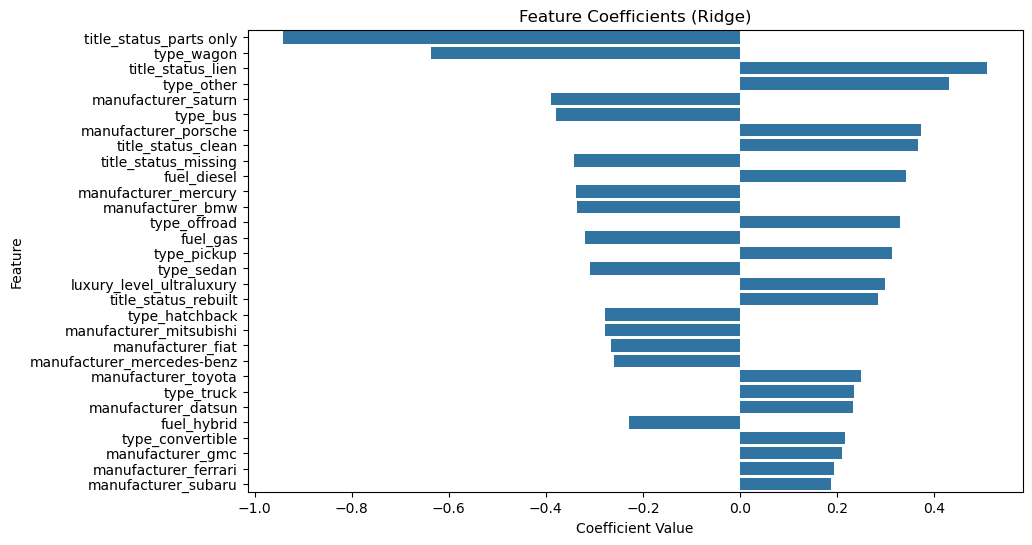

In [104]:
# Visualizing Feature Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x = 'coef', y = 'feature_names', data = top_15_coeff_ridge, orient = 'h')
plt.title('Feature Coefficients (Ridge)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

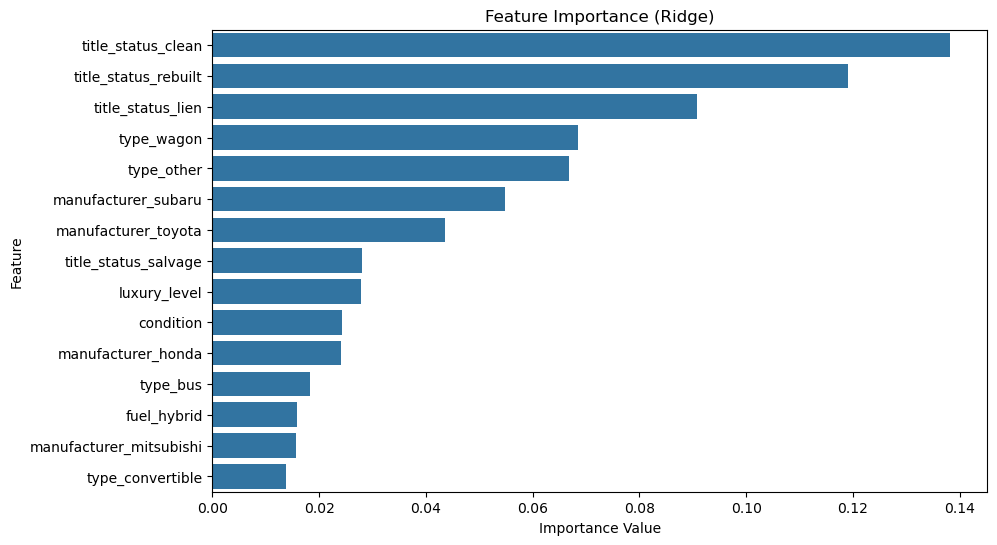

In [105]:
# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = top_15_important_feat_ridge, orient = 'h')
plt.title('Feature Importance (Ridge)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

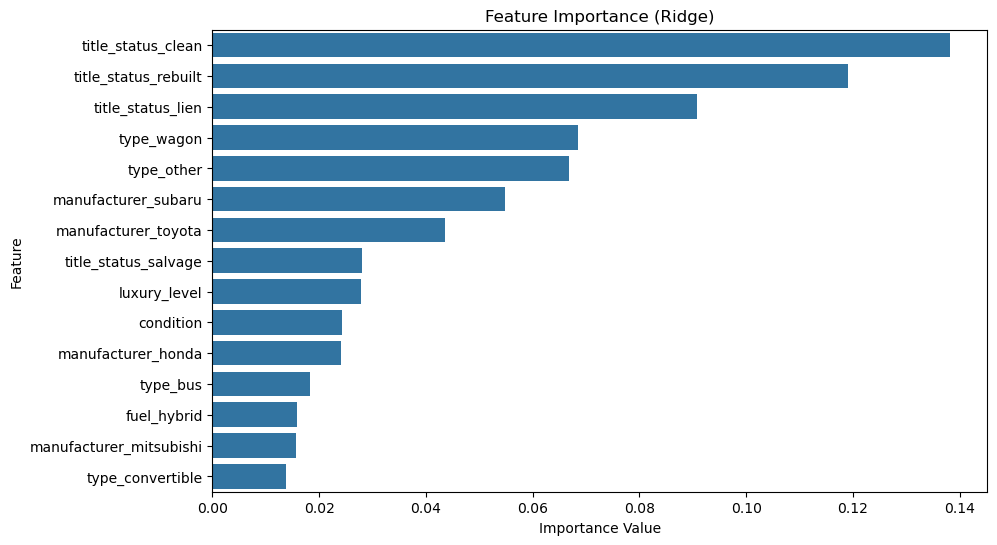

In [107]:
# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = top_15_important_feat_ridge, orient = 'h')
plt.title('Feature Importance (Ridge)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()

In [108]:
#To maximize the price at which a vehicle is sold, dealerships should focus in order of importance on below aspects:

   # Year (vintage) of the vehicle - Generally, newer vehicles command higher prices in the used car market due to factors like updated features and technology, as well as potentially lower mileage.

   # Condition of the vehicle - Vehicles in excellent or good condition typically fetch higher prices compared to those in fair or poor condition.

   # Type of vehicle - Sedans are popular and often come with a higher price tag in the used car market, followed by pickups and wagons.

   # Odometer - Lower mileage typically translates to a higher price, with each mile increase leading to a decrease in value.

   # Drive type - Rear-wheel drive cars tend to have higher value compared to front-wheel drive cars.

   # Cylinders - Vehicles with larger engines, particularly with 8 or 6 cylinders, are preferred and can command higher prices.

   # Fuel type - Diesel cars generally fetch higher prices, but gas cars are also popular, though typically not as expensive as diesel.

   # Car title - A clean title is essential for maximizing the value of a used car.

   # Manufacturer - Toyota and Honda are popular choices in the used car market, while luxury cars may not sell as easily.

# Considering these factors, a customer will ideally look for:-
  #A newer vehicle in excellent condition
  #Low mileage
  #Rear-wheel drive
  #Larger engine size (8 or 6 cylinders)
  #Clean title
  #Preferably from manufacturers like Toyota and Honda. 


In [109]:
# Future improvements

# We could perform some feature engineering to the input dataset and verify if it enables reduction in the error.
# Using an imputer to determine Nan values and verify if there is any change in the result.